# Axisymmetric Spacetimes 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Importing & Accessing data 

In [2]:
df = pd.read_csv("AxisymHorizon.csv")
print(df)

theta = df["theta"].values
h = df["h"].values

           theta         h
0   1.000000e-08 -0.000008
1   4.986656e-02 -0.000008
2   9.973311e-02 -0.000008
3   1.495997e-01 -0.000008
4   1.994662e-01 -0.000007
..           ...       ...
59  2.942126e+00  0.000003
60  2.991993e+00  0.000003
61  3.041860e+00  0.000003
62  3.091726e+00  0.000003
63  3.141593e+00  0.000003

[64 rows x 2 columns]


## Values of your own control!

In [3]:
# Modify the value here (from input.py):
Ntheta = 64

# Modify with your own phi resolution! 
phi = np.linspace(0, 2*np.pi, Ntheta)

# Making a meshgrid of theta and phi values
phi_grid, theta_grid = np.meshgrid(phi, theta)

## Initial guess function $h(\theta)_{\text{guess}}$, from Input.py

### See here -> https://www.desmos.com/calculator/x6iyq0kvln

In [4]:
def hguess(t):
    # Modify the function here:
    return 0.5*(1 + 0.3*np.sin(4*t))

h0 = hguess(theta)
#print(h0)

## Conversion to Cartesian coordinates for 3D visualisations

In [5]:
def cartesian(r, t, p):
    x = r*np.sin(t)*np.cos(p)
    y = r*np.sin(t)*np.sin(p)
    z = r*np.cos(t)
    return x, y, z

In [6]:
# Make h0 and h 2D arrays matching theta_grid
h0_2d = np.tile(h0[:, np.newaxis], (1, phi_grid.shape[1]))
h_2d = np.tile(h[:, np.newaxis], (1, phi_grid.shape[1]))

# Converting to Cartesian 
x0, y0, z0 = cartesian(h0_2d, theta_grid, phi_grid)
xsol, ysol, zsol= cartesian(h_2d, theta_grid, phi_grid)

## Plotting! 

### 2D Visualisation

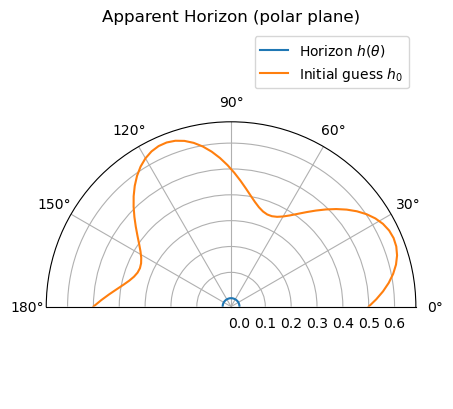

In [7]:
fig2D_polar = plt.figure()
ax = fig2D_polar.add_subplot(111, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
ax.plot(theta, h, label=r"Horizon $h(\theta)$")
ax.plot(theta, h0, label=r"Initial guess $h_0$")
ax.set_title("Apparent Horizon (polar plane)")
ax.legend()

plt.show()

### 3D Visualisation

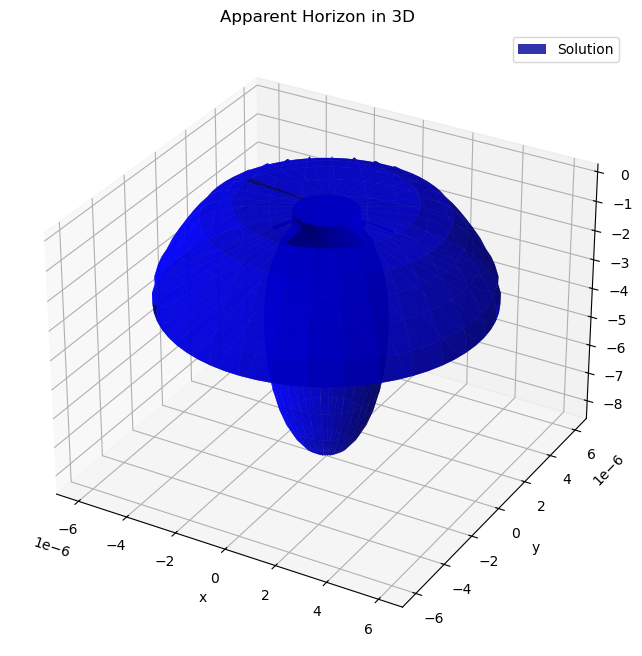

In [8]:
fig3D = plt.figure(figsize=(10,8))
ax = fig3D.add_subplot(111, projection='3d')

#ax.scatter(x0, y0, z0, c="orange", label="Initial guess", s=10)
#ax.scatter(xsol, ysol, zsol, c="blue", label="Solution", s=10)
#ax.plot_surface(x0, y0, z0, color="red", alpha=0.5, label="Initial guess")
ax.plot_surface(xsol, ysol, zsol, color="blue", alpha=0.8, label="Solution")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Apparent Horizon in 3D")
ax.legend()
plt.show()